'''
                                            TITANIC DATASET
                                            
1. Import the relevant python libraies for the analysis

2. Load the train and test dataset and set the index if applicable

3. Visually inspect the head of the dataset,Examine the train dataset to understand in particular if the data is tidy, shape of the dataset,examine datatypes, examine missing values, unique counts and build a data dictictionary dataframe

4. Run discriptive statistics of object and numerical datatypes, and finally transform datatypes accordingly

5. Carry-out univariate,bivariate and multivariate analysis using graphical and non graphical(some numbers represting the data) mediums

6. Feature Engineering : Extract title from name, Extract new features from name, age, fare, sibsp, parch and cabin

7. Preprocessing and Prepare data for statistical modeling

8. Statistical Modelling
'''

In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score,confusion_matrix

In [183]:
train = pd.read_csv("train_Titanic.csv")
test = pd.read_csv("test_Titanic.csv")

In [184]:
train_org = train.copy()
test_org = test.copy()

In [185]:
train.shape,test.shape

((891, 12), (418, 11))

In [186]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [187]:
#Find Categorical and Numerical Columns
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [188]:
data = pd.DataFrame(train.dtypes)
data.rename(columns={0:'DataType'},inplace=True)

In [189]:
data["NullValue_Count"] = train.isnull().sum()

In [190]:
data["Unique_Value"] = train.nunique()

In [191]:
data["Count"] = train.count()

In [192]:
data["Percentage_MissValue"] = train.isna().mean().round(4) * 100
data.sort_values(by='DataType',ascending=False, inplace=True)
data

,DataType,NullValue_Count,Unique_Value,Count,Percentage_MissValue
Name,object,0,891,891,0.00
Sex,object,0,2,891,0.00
Ticket,object,0,681,891,0.00
Cabin,object,687,147,204,77.10
Embarked,object,2,3,889,0.22
Age,float64,177,88,714,19.87
Fare,float64,0,248,891,0.00
PassengerId,int64,0,891,891,0.00
Survived,int64,0,2,891,0.00
Pclass,int64,0,3,891,0.00


#Univariate Analysis

In [193]:
train.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [194]:
train.Sex.value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [195]:
train.Pclass.value_counts(normalize=True)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [196]:
train.SibSp.value_counts(normalize=True)

0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: SibSp, dtype: float64

In [197]:
train.Parch.value_counts(normalize=True)

0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: Parch, dtype: float64

In [198]:
train.Embarked.value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

#Visualization

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


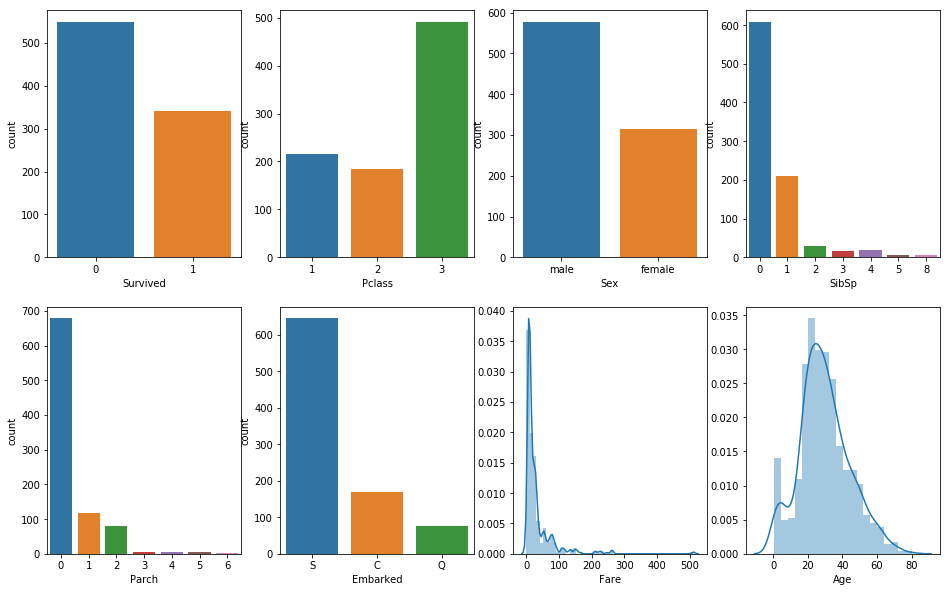

In [199]:
#Using Seaborn
fig, axes = plt.subplots(2 ,4 ,figsize=(16,10))
sns.countplot(train["Survived"],ax=axes[0,0])
sns.countplot(train["Pclass"],ax=axes[0,1])
sns.countplot(train["Sex"],ax=axes[0,2])
sns.countplot(train["SibSp"],ax=axes[0,3])
sns.countplot(train["Parch"],ax=axes[1,0])
sns.countplot(train["Embarked"],ax=axes[1,1])
sns.distplot(train["Fare"], ax=axes[1,2])
sns.distplot(train["Age"].dropna(), ax=axes[1,3])

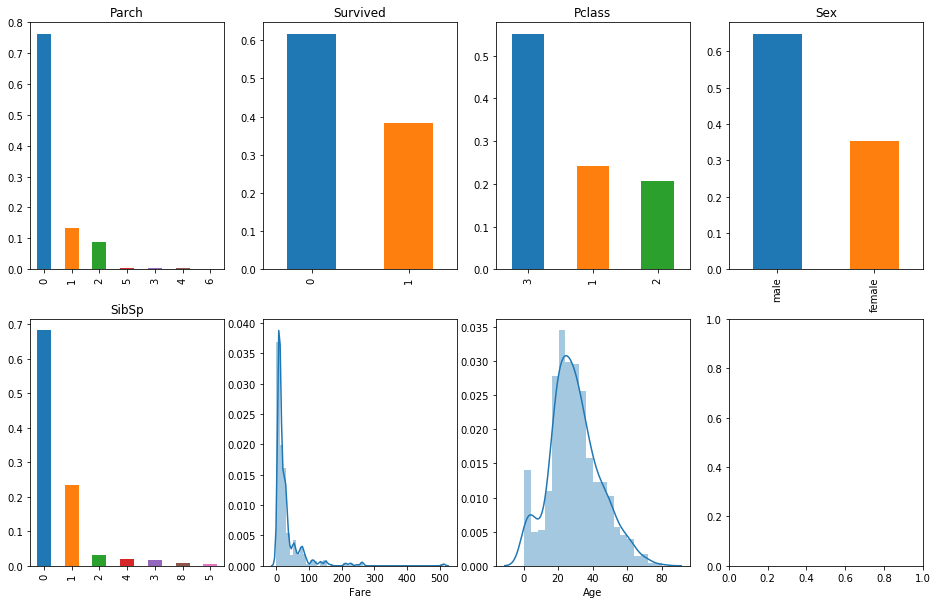

In [200]:
#Using Matplotlib
fig, axes = plt.subplots(2 ,4 ,figsize=(16,10))
train["Parch"].value_counts(normalize=True).plot(kind='bar',title="Parch",ax=axes[0,0])
train["Survived"].value_counts(normalize=True).plot(kind='bar',title='Survived',ax=axes[0,1])
train["Pclass"].value_counts(normalize=True).plot(kind='bar',title="Pclass",ax=axes[0,2])
train["Sex"].value_counts(normalize=True).plot(kind='bar',title="Sex",ax=axes[0,3])
train["SibSp"].value_counts(normalize=True).plot(kind='bar',title="SibSp",ax=axes[1,0])
sns.distplot(train["Fare"], ax=axes[1,1])
sns.distplot(train["Age"].dropna(), ax=axes[1,2])

#Bivariate Analysis

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


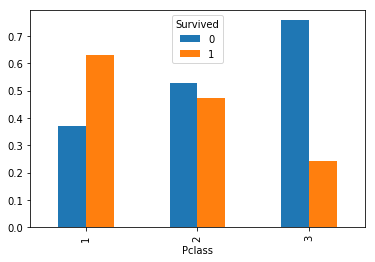

In [201]:
print(train[["Pclass","Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived',ascending=False))
Pclass = pd.crosstab(train["Pclass"],train["Survived"])
Pclass.div(Pclass.sum(1).astype(float),axis=0).plot(kind='bar')

   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


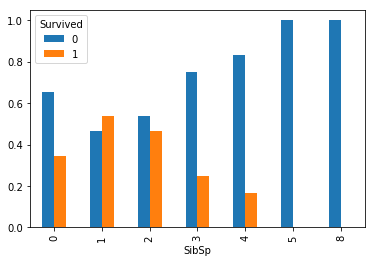

In [202]:
print(train[["SibSp","Survived"]].groupby('SibSp', as_index=False).mean().sort_values(by='Survived', ascending=False))
SibSp = pd.crosstab(train["SibSp"],train["Survived"])
SibSp.div(SibSp.sum(1).astype(float),axis=0).plot(kind='bar')

   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000


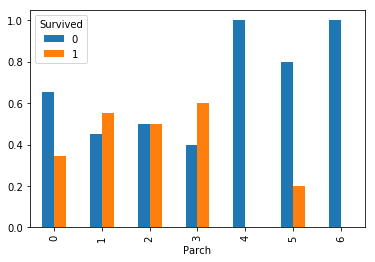

In [203]:
print(train[["Parch","Survived"]].groupby('Parch', as_index=False).mean().sort_values(by='Survived', ascending=False))
Parch = pd.crosstab(train["Parch"],train["Survived"])
Parch.div(Parch.sum(1).astype(float),axis=0).plot(kind='bar')

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


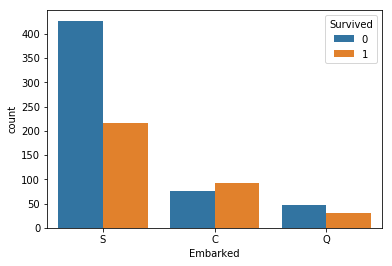

In [204]:
print(train[["Embarked","Survived"]].groupby('Embarked', as_index=False).mean().sort_values(by='Survived', ascending=False))
#Embark = pd.crosstab(train["Embarked"],train["Survived"])
#Embark.div(Embark.sum(1).astype(float),axis=0).plot(kind='bar')
sns.countplot(x='Embarked',hue='Survived',data=train)

In [205]:
train[train['Name'].str.contains('Brown')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
194,195,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.0,0,0,PC 17610,27.7208,B4,C
328,329,1,3,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,31.0,1,1,363291,20.5250,NaN,S
345,346,1,2,"Brown, Miss. Amelia ""Mildred""",female,24.0,0,0,248733,13.0000,F33,S
670,671,1,2,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",female,40.0,1,1,29750,39.0000,NaN,S
684,685,0,2,"Brown, Mr. Thomas William Solomon",male,60.0,1,1,29750,39.0000,NaN,S


In [206]:
#Data Wrangling

train.drop(columns=["Ticket","Cabin"],axis=1,inplace=True)
test.drop(columns=["Ticket","Cabin"],axis=1,inplace=True)

In [207]:
train.shape,test.shape

((891, 10), (418, 9))

In [208]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


   Pclass        Age
2       3  25.140620
1       2  29.877630
0       1  38.233441


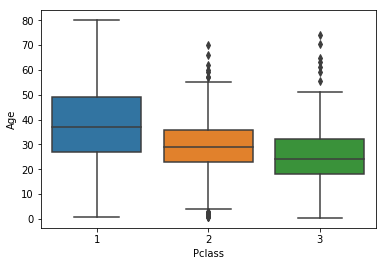

In [209]:
#Dealing with missing Values
print(train[["Pclass","Age"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Pclass',ascending=False))
sns.boxplot(x='Pclass',y='Age',data=train)

In [210]:
def impute_age(col):
    Age = col[0]
    Pclass = col[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age

In [211]:
train["Age"]=train[["Age","Pclass"]].apply(impute_age,axis=1)
test["Age"]=test[["Age","Pclass"]].apply(impute_age,axis=1)

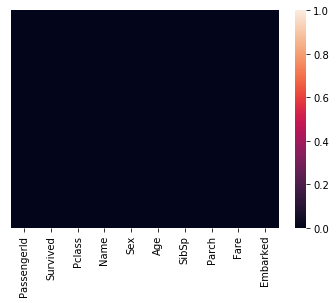

In [212]:
sns.heatmap(train.isnull(),yticklabels=False)

In [213]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [214]:
train.Embarked.mode()[0]

'S'

In [215]:
train["Embarked"]=train["Embarked"].fillna('S')

In [216]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [217]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [218]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


#Converting Categorical to Numerical

In [219]:
encoding = OneHotEncoder()
encode.fit_transform(train["Sex"])

train["Sex"] = train["Sex"].map({'female':0,'male':1})
test["Sex"] = test["Sex"].map({'female':0,'male':1})

In [220]:
train["Embarked"] = train["Embarked"].map({'C':0,'Q':1,'S':2})
test["Embarked"] = test["Embarked"].map({'C':0,'Q':1,'S':2})

In [221]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2


In [222]:
train = train.drop("Name",axis=1)

In [223]:
train["FareBand"]=pd.qcut(train["Fare"],4)
train[["FareBand","Survived"]].groupby(['FareBand'],as_index=False).mean().sort_values(ascending=True,by='FareBand')

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [224]:
test["Fare"].fillna(test["Fare"].dropna().median(),inplace=True)

In [225]:
train["AgeBand"] = pd.cut(train["Age"],5)
train[["AgeBand","Survived"]].groupby(["AgeBand"],as_index=False).mean()

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.336714
2,"(32.252, 48.168]",0.412844
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [226]:
data=[train,test]
for j in data:
    j.loc[j["Age"] <= 16.336,'Age'] = 0
    j.loc[(j["Age"] > 16.336) & (j["Age"] <= 32.252),'Age'] = 1
    j.loc[(j["Age"] > 32.252) & (j["Age"] <= 48.168),'Age'] = 2
    j.loc[(j["Age"] > 48.168) & (j["Age"] <= 64.084),'Age'] = 3
    j.loc[j["Age"] > 64.084,'Age'] = 4
    j["Age"] = j["Age"].astype(int)

train = train.drop("AgeBand",axis=1)    
train.head()    

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FareBand
0,1,0,3,1,1,1,0,7.2500,2,"(-0.001, 7.91]"
1,2,1,1,0,2,1,0,71.2833,0,"(31.0, 512.329]"
2,3,1,3,0,1,0,0,7.9250,2,"(7.91, 14.454]"
3,4,1,1,0,2,1,0,53.1000,2,"(31.0, 512.329]"
4,5,0,3,1,2,0,0,8.0500,2,"(7.91, 14.454]"


In [232]:
data=[train,test]
for i in data:
    i.loc[i['Fare'] <= 7.91, 'Fare'] = 0
    i.loc[(i['Fare'] > 7.91) & (i['Fare'] <= 14.454) ,'Fare'] = 1
    i.loc[(i['Fare'] > 14.454) & (i['Fare'] <= 31) ,'Fare'] = 2
    i.loc[i['Fare'] > 31 ,'Fare'] = 3
    i['Fare'] = i["Fare"].astype(int)
    
#train=train.drop("FareBand",axis=1)    
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,1,1,0,0,2
1,2,1,1,0,2,1,0,3,0
2,3,1,3,0,1,0,0,1,2
3,4,1,1,0,2,1,0,3,2
4,5,0,3,1,2,0,0,1,2


In [243]:
X_train = train.drop(columns='Survived',axis=1)
y_train = train["Survived"]
X_test = test.drop(['Name'],axis=1).copy()
#y_test = train["Survived"]

In [244]:
test.shape

(418, 9)

In [245]:
y_train.shape

(891,)

In [246]:
y_predict.shape

(418,)

In [250]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [270]:
#X=train[['Age', 'SibSp', 'Parch','Fare']].values # Taking all the numerical values
#y = train['Survived'].values
RF = RandomForestClassifier(n_estimators=5,criterion='entropy')
RF.fit(X_train, y_train)
# Make a prediction
y_predict = RF.predict(X_test)
pd.DataFrame({'PassengerId':test_org["PassengerId"],'Survived':y_predict}).to_csv('1Submission.csv', index=False)
RF.score(X_train,y_train)

0.9696969696969697

In [272]:
logReg = LogisticRegression(solver='newton-cg',n_jobs=1)
logReg.fit(X_train, y_train)
# Make a prediction
y_predict = RF.predict(X_test)
logReg.score(X_train,y_train)
pd.DataFrame({'PassengerId':test_org["PassengerId"],'Survived':y_predict}).to_csv('Log_Submission.csv', index=False)